# Importing Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.discriminant_analysis import StandardScaler
from scipy.stats.mstats import winsorize

from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

import xgboost as xgb
import lightgbm as lgb
import catboost as cat
from sklearn.ensemble import RandomForestRegressor,StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet

In [33]:
import random
np.random.seed(42)
random.seed(42)

In [34]:
# from google.colab import drive
# drive.mount('/content/drive')

In [35]:
# # df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
df = pd.read_csv('train.csv')
df
# df = pd.read_csv('Train fix.csv')

,id,timestamp,device,PCell_RSRP_max,PCell_RSRQ_max,PCell_RSSI_max,PCell_SNR_max,PCell_Downlink_Num_RBs,PCell_Downlink_Average_MCS,PCell_Downlink_bandwidth_MHz,...,dewPoint,humidity,pressure,windSpeed,cloudCover,uvIndex,visibility,Traffic Jam Factor,area,target
0,Id_qt2qn56050,1624367008,pc1,-84.498750,-14.586875,-49.855625,16.457,35076.0,23.0,20.0,...,13.86,0.62,1013.6,2.39,0.95,4.0,16.093,0.38979,Residential,51500000.0
1,Id_f1zf07cwb6,1624372465,pc3,-86.818125,-11.982500,-54.838125,16.674,42704.0,24.0,20.0,...,14.52,0.59,1013.5,2.29,0.82,3.0,16.093,3.78322,Residential,50300000.0
2,Id_uoxdz7di5b,1624371871,pc3,-101.916250,-13.257500,-71.241250,9.392,36017.0,22.0,20.0,...,14.71,0.61,1013.8,2.13,0.82,3.0,16.093,2.08425,Residential,16500000.0
3,Id_hzn8nj29gu,1624542066,pc1,-95.598750,-14.696250,-61.660000,10.726,95955.0,17.0,20.0,...,13.43,0.71,1017.9,1.97,0.99,3.0,16.093,8.80702,Avenue,46400000.0
4,Id_2kfrccrfiw,1624542798,pc1,-97.735000,-14.867500,-63.170625,10.889,83062.0,19.0,20.0,...,13.46,0.71,1017.9,1.97,0.99,3.0,16.093,2.21843,Park,50200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34269,Id_lc1vv34d0r,1624354061,pc1,-72.789375,-10.436875,-43.340625,6.342,96320.0,16.0,20.0,...,13.90,0.73,1012.2,4.23,0.97,4.0,16.093,2.66218,Park,78800000.0
34270,Id_qywxdy2q50,1624349993,pc3,-86.219375,-12.911875,-56.473750,13.201,45069.0,27.0,20.0,...,14.06,0.77,1011.9,4.07,0.97,3.0,16.093,2.08918,Park,25000000.0
34271,Id_5ll45hn5yd,1624377135,pc3,-85.964375,-13.278750,-51.610000,11.295,33942.0,19.0,20.0,...,14.76,0.57,1013.7,2.22,0.76,2.0,16.093,1.94504,Residential,36300000.0
34272,Id_7uz4vnrnzu,1624542859,pc1,-92.546250,-14.460625,-58.441875,13.096,87065.0,20.0,20.0,...,13.44,0.71,1017.9,1.97,0.99,3.0,16.093,1.24398,Park,52800000.0


# DATA EXPLORATION

-> PCell_Cell_Identity, SCell_Cell_Identity -> droppable feature(?)
-> When SCell_RSRP_max is null, SCell_RSRQ_max and SCell_RSSI_max are also null. This implies that when SCell_RSRP_max is null, the SCell is not active or mostly not available
-> When SCell_Downlink_Num_RBs is not null, SCell's RSRP, RSRQ, and RSSI are also not null. But SCell_Downlink_bandwidth_MHz still has sum null value, so it is imputable when downlink resource blocks are not null
-> PCell downlink bandwidth should be imputable since PCell is always available



In [36]:
#Jumlah value kosong di kolom yg ada value yg kosong

df[df.columns[df.isnull().any()]].isnull().sum()
# PCell_Cell_Identity, SCell_Cell_Identity -> droppable feature(?)

PCell_Downlink_bandwidth_MHz     1067
PCell_Cell_Identity              1067
SCell_RSRP_max                  15262
SCell_RSRQ_max                  15262
SCell_RSSI_max                  15262
SCell_SNR_max                   15262
SCell_Downlink_Num_RBs          15939
SCell_Downlink_Average_MCS      15939
SCell_Downlink_bandwidth_MHz    20849
SCell_Cell_Identity             20849
SCell_freq_MHz                  15262
Altitude                            7
Traffic Jam Factor                328
dtype: int64

In [37]:
testdf = df.copy()[df["SCell_RSRP_max"].isnull()]
testdf = testdf.drop(
    columns=(testdf.columns[testdf.isnull().any() == False])
    )


testdf[testdf["SCell_RSRQ_max"].isnull()]["SCell_RSSI_max"].isnull().sum()

#Conclusion: When SCell_RSRP_max is null, SCell_RSRQ_max and SCell_RSSI_max are also null.
# This implies that when SCell_RSRP_max is null, the SCell is not active or not available.

np.int64(15262)

In [38]:
testdf = df.copy()[df["SCell_RSRP_max"].isnull()]
testdf = testdf.drop(
    columns=(testdf.columns[testdf.isnull().any() == False])
    )


testdf[testdf["SCell_Downlink_bandwidth_MHz"].isnull()]["SCell_Downlink_Num_RBs"].isnull().sum()

np.int64(15256)

In [39]:
df.describe()
# Conclusion: There are some attributes with a significantly larger scale than other attributes, 
# this could result in a bias, so scaling is needed.
# Large STD and larger max value or small min value compared to the mean shows there are some outliers,
# so winsorization is needed

,timestamp,PCell_RSRP_max,PCell_RSRQ_max,PCell_RSSI_max,PCell_SNR_max,PCell_Downlink_Num_RBs,PCell_Downlink_Average_MCS,PCell_Downlink_bandwidth_MHz,PCell_Cell_Identity,PCell_freq_MHz,...,apparentTemperature,dewPoint,humidity,pressure,windSpeed,cloudCover,uvIndex,visibility,Traffic Jam Factor,target
count,3.427400e+04,34274.000000,34274.000000,34274.000000,34274.000000,34274.000000,34274.000000,33207.000000,3.320700e+04,34274.000000,...,34274.000000,34274.000000,34274.000000,34274.000000,34274.000000,34274.000000,34274.000000,3.427400e+04,33946.000000,3.427400e+04
mean,1.624447e+09,-87.085767,-13.061258,-54.435712,11.861843,64089.078835,19.973858,19.233746,1.898801e+07,1926.737469,...,20.076148,13.952753,0.682186,1015.186410,2.613565,0.938075,2.564072,1.609300e+01,3.328803,5.550386e+07
std,9.176344e+04,11.719533,2.463729,10.765029,7.414607,22991.689616,5.054947,1.898843,1.381858e+07,264.412295,...,1.951120,0.462473,0.063657,2.377349,0.756239,0.078149,1.023344,3.552766e-15,2.202747,4.319385e+07
min,1.624348e+09,-175.605625,-24.774375,-87.852500,-15.603000,4.000000,0.000000,5.000000,2.567188e+06,900.000000,...,18.130000,13.300000,0.550000,1011.900000,1.960000,0.760000,1.000000,1.609300e+01,0.000000,4.800000e+04
25%,1.624367e+09,-95.201562,-14.790000,-61.961719,6.431250,43724.000000,17.000000,20.000000,3.282957e+06,1800.000000,...,18.670000,13.610000,0.620000,1013.500000,2.160000,0.940000,2.000000,1.609300e+01,2.171180,2.400000e+07
50%,1.624377e+09,-86.845313,-12.681875,-53.992500,12.171000,62785.000000,21.000000,20.000000,2.635878e+07,1800.000000,...,18.880000,13.800000,0.710000,1013.800000,2.290000,0.970000,3.000000,1.609300e+01,3.009460,4.240000e+07
75%,1.624548e+09,-79.246719,-11.378252,-46.845156,17.579000,87828.000000,24.000000,20.000000,2.694707e+07,2000.000000,...,21.610000,14.110000,0.730000,1017.700000,2.430000,0.990000,3.000000,1.609300e+01,3.454510,7.200000e+07
max,1.624554e+09,-55.550625,-5.389375,-13.032500,28.622000,100471.000000,28.000000,20.000000,5.184258e+07,2600.000000,...,23.880000,14.920000,0.770000,1018.000000,4.250000,1.000000,4.000000,1.609300e+01,9.602590,2.710000e+08


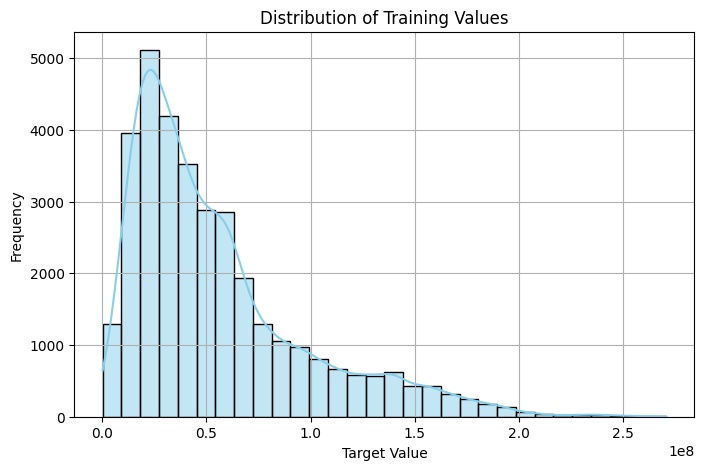

In [40]:

plt.figure(figsize=(8, 5))
sns.histplot(df['target'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Training Values")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
# Although data is left skewed, log1p and quantile transformer result in worse model results

# A. Data Cleaning
## I. Handling Missing Data

PCell_Cell_Identity, SCell_Cell_Identity -> droppable(?)
PCell_Downlink_bandwidth_MHz-> unique values cuman 3, perlu dianalisa apakah bisa diisi berdasarkan kemiripan dengan row lain atau diisi pake ml dulu(?)
SCell_Downlink_bandwidth_MHz -> isi 20 semua

In [41]:
df.index


RangeIndex(start=0, stop=34274, step=1)

In [42]:
def impute_SCell_Downlink_bandwidth_MHz(row,mean):
    if pd.notna(row["SCell_Downlink_bandwidth_MHz"]):
        return row["SCell_Downlink_bandwidth_MHz"]
    if pd.isna(row["SCell_Downlink_bandwidth_MHz"]): # if SCell_Downlink_Num_RBs != 0 -> simple impute
        if  pd.notna(row["SCell_Downlink_Num_RBs"]) and pd.notna(row["SCell_RSRP_max"]):
            return mean
        return 0
    return 0


def impute_SCell_Downlink_Num_RBs(row): 
    if pd.notna(row["SCell_Downlink_Num_RBs"]):
        return row["SCell_Downlink_Num_RBs"]
    if pd.isna(row["SCell_Downlink_Num_RBs"]): #if SCell RSRP != 0 -> simple impute
        return 0
    return 0

def impute_SCell_Downlink_Average_MCS(row):
    if pd.notna(row["SCell_Downlink_Average_MCS"]):
        return row["SCell_Downlink_Average_MCS"]
    if pd.isna(row["SCell_Downlink_Average_MCS"]): #if SCell RSRP != 0 -> simple impute
        return 0
    return 0


def impute_SCell_RSRP_max(row):
    if pd.notna(row["SCell_RSRP_max"]):
        return row["SCell_RSRP_max"]
    if pd.isna(row["SCell_RSRP_max"]):
        return 0
    return 0

def impute_SCell_RSRQ_max(row):
    if pd.notna(row["SCell_RSRQ_max"]):
        return row["SCell_RSRQ_max"]
    if pd.isna(row["SCell_RSRQ_max"]):
        return 0
    return 0

def impute_SCell_RSSI_max(row):
    if pd.notna(row["SCell_RSSI_max"]):
        return row["SCell_RSSI_max"]
    if pd.isna(row["SCell_RSSI_max"]):
        return 0
    return 0

def impute_SCell_SNR_max(row):
    if pd.notna(row["SCell_SNR_max"]):
        return row["SCell_SNR_max"]
    if pd.isna(row["SCell_SNR_max"]):
        return 0
    return 0

def impute_SCell_freq_MHz(row):
    if pd.notna(row["SCell_freq_MHz"]):
        return row["SCell_freq_MHz"]
    if pd.isna(row["SCell_freq_MHz"]):
        return 0
    return 0

def impute_PCell_Downlink_bandwidth_MHz(df=df, train = True):
    if df["PCell_Downlink_bandwidth_MHz"].isnull().sum() == 0:
        return df["PCell_Downlink_bandwidth_MHz"]
    
    if df["PCell_Downlink_bandwidth_MHz"].isnull().any(): #simple impute:
        return df["PCell_Downlink_bandwidth_MHz"].fillna(df["PCell_Downlink_bandwidth_MHz"].mean())

def impute_Altitude(df = df):
    if df["Altitude"].isnull().sum() == 0:
        return df["Altitude"]
    else:
        return df["Altitude"].fillna(df["Altitude"].mean())

def impute_Traffic_Jam_Factor(df):
    if df["Traffic Jam Factor"].isnull().sum() == 0:
        return df["Traffic Jam Factor"]
    else:
        return df["Traffic Jam Factor"].fillna(df["Traffic Jam Factor"].mean())



In [43]:
def manual_impute(df : pd.DataFrame , train : bool = True):
    ret = df.copy()
    SCell_Downlink_bandwidth_MHz_mean = ret["SCell_Downlink_bandwidth_MHz"].mean()
    ret["SCell_Downlink_bandwidth_MHz"] = df.apply(lambda row : impute_SCell_Downlink_bandwidth_MHz(row,SCell_Downlink_bandwidth_MHz_mean), axis=1)
    ret["SCell_Downlink_Num_RBs"] = df.apply(impute_SCell_Downlink_Num_RBs,axis=1)
    ret["SCell_Downlink_Average_MCS"] = df.apply(impute_SCell_Downlink_Average_MCS, axis=1)
    ret["SCell_RSRP_max"] = df.apply(impute_SCell_RSRP_max, axis=1)
    ret["SCell_RSRQ_max"] = df.apply(impute_SCell_RSRQ_max, axis=1)
    ret["SCell_RSSI_max"] = df.apply(impute_SCell_RSSI_max, axis=1)
    ret["SCell_SNR_max"] = df.apply(impute_SCell_SNR_max, axis=1)
    ret["SCell_freq_MHz"] = df.apply(impute_SCell_freq_MHz, axis=1)
    ret["PCell_Downlink_bandwidth_MHz"] = impute_PCell_Downlink_bandwidth_MHz(ret, train)
    ret["Altitude"] = impute_Altitude(ret)
    ret["Traffic Jam Factor"] = impute_Traffic_Jam_Factor(ret)

    return ret

## II. Dealing with outliers
using winsorization to cap outliers

In [44]:
def apply_winsorization(df, limits=(0.001, 0.001)):
    ret = df.copy()

    for column in ret.select_dtypes(include=['float64', 'int64']).columns:
        ret[column] = winsorize(ret[column], limits=limits)

    return ret


## III. Data transform

In [45]:
def one_hot_encode_device(df):
    ret = df.copy()
    onehot_device = pd.get_dummies(ret['device']).apply(lambda x: x.astype(int))
    onehot_area = pd.get_dummies(ret['area']).apply(lambda x: x.astype(int))
    ret = pd.concat([ret, onehot_device, onehot_area], axis=1)
    return ret

def convert_to_datetime(row):
    ret = row.copy()
    ret["timestamp"] = pd.to_datetime(ret["timestamp"], unit='s')
    return ret

In [46]:
def data_transformation(df, train : bool = True):
    ret = df.copy()
    ret = one_hot_encode_device(ret)
    ret = convert_to_datetime(ret)
    return ret

## IV. Feature Engineering



In [47]:
# Time features
def dayof_week(df):
    return df["timestamp"].dt.isocalendar().day.astype(int)
def hour(df):
    return df["timestamp"].dt.hour.astype(int)
def weekof_month(df):
    return ((df["timestamp"].dt.day - 1) // 7 + 1).astype(int)
def month(df):
    return df["timestamp"].dt.month.astype(int)
def is_weekend(df):
    return (df["timestamp"].dt.dayofweek >= 5).astype(int)
def is_weekday(df):
    return (df["timestamp"].dt.dayofweek < 5).astype(int)
def is_peakhour(df):
    return df["timestamp"].dt.hour.isin([7, 8, 9, 17, 18, 19]).astype(int)

# Telecommunications features
def RSRP_max(df):
    return ((df["PCell_RSRP_max"] * (df["PCell_RSRP_max"] > df["SCell_RSRP_max"])).astype(int) +
            (df["SCell_RSRP_max"] * (df["SCell_RSRP_max"] > df["PCell_RSRP_max"])).astype(int)
    ).fillna(0)
def RSRQ_max(df):
    return ((df["PCell_RSRQ_max"] * (df["PCell_RSRQ_max"] > df["SCell_RSRQ_max"])).astype(int) +
            (df["SCell_RSRQ_max"] * (df["SCell_RSRQ_max"] > df["PCell_RSRQ_max"])).astype(int)
    ).fillna(0)
def RSSI_max(df):
    return ((df["PCell_RSSI_max"] * (df["PCell_RSSI_max"] > df["SCell_RSSI_max"])).astype(int) +
            (df["SCell_RSSI_max"] * (df["SCell_RSSI_max"] > df["PCell_RSSI_max"])).astype(int)
    ).fillna(0)
def SNR_max(df):
    return ((df["PCell_SNR_max"] * (df["PCell_SNR_max"] > df["SCell_SNR_max"])).astype(int) +
            (df["SCell_SNR_max"] * (df["SCell_SNR_max"] > df["PCell_SNR_max"])).astype(int)
    ).fillna(0)

def avg_RSRP(df):
    return ((df["PCell_RSRP_max"] + df["SCell_RSRP_max"]) / 2).fillna(0)
def avg_RSRQ(df):
    return ((df["PCell_RSRQ_max"] + df["SCell_RSRQ_max"]) / 2).fillna(0)
def avg_RSSI(df):
    return ((df["PCell_RSSI_max"] + df["SCell_RSSI_max"]) / 2).fillna(0)
def avg_SNR(df):
    return ((df["PCell_SNR_max"] + df["SCell_SNR_max"]) / 2).fillna(0)

def avg_RSRP_per_RB(df):
    total_rb = df["PCell_Downlink_Num_RBs"] + df["SCell_Downlink_Num_RBs"]
    return ((df["PCell_RSRP_max"] * df["PCell_Downlink_Num_RBs"] / total_rb) +
            (df["SCell_RSRP_max"] * df["SCell_Downlink_Num_RBs"] / total_rb)
    ).fillna(0)
def avg_RSRQ_per_RB(df):
    total_rb = df["PCell_Downlink_Num_RBs"] + df["SCell_Downlink_Num_RBs"]
    return ((df["PCell_RSRQ_max"] * df["PCell_Downlink_Num_RBs"] / total_rb)+
            (df["SCell_RSRQ_max"] * df["SCell_Downlink_Num_RBs"] / total_rb)
    ).fillna(0)
def avg_RSSI_per_RB(df):
    total_rb = df["PCell_Downlink_Num_RBs"] + df["SCell_Downlink_Num_RBs"]
    return ((df["PCell_RSSI_max"] * df["PCell_Downlink_Num_RBs"] / total_rb) +
            (df["SCell_RSSI_max"] * df["SCell_Downlink_Num_RBs"] / total_rb)
    ).fillna(0)

def PCell_load_bandwidth(df):
    return ((df["PCell_Downlink_Num_RBs"] / df["PCell_Downlink_bandwidth_MHz"])
    * (df["PCell_Downlink_bandwidth_MHz"]!= 0 )).fillna(0)
def SCell_load_bandwidth(df):
    return ((df["SCell_Downlink_Num_RBs"] / df["SCell_Downlink_bandwidth_MHz"])
    * (df["SCell_Downlink_bandwidth_MHz"] != 0 )).fillna(0)

def PCell_SNR_max_W(df):
    return 10 ** ((df['PCell_SNR_max'] - 30) / 10)
def SCell_SNR_max_W(df):
    return 10 ** ((df['SCell_SNR_max'] - 30) / 10)

def P_Cell_capacity(df):
    B_Hz = df["PCell_Downlink_bandwidth_MHz"]*(10**6)
    return  B_Hz*np.log2(1 + PCell_SNR_max_W(df))
def S_Cell_capacity(df):
    B_Hz = df["SCell_Downlink_bandwidth_MHz"]*(10**6)
    return  B_Hz*np.log2(1 + SCell_SNR_max_W(df))

def doppler_spread_PCell(df):
    return (df["speed_kmh"]*1000/360)/(3*(10**8))*df["PCell_freq_MHz"]*1e6

def doppler_spread_SCell(df):
    return (df["speed_kmh"]*1000/360)/(3*(10**8))*df["SCell_freq_MHz"]*1e6

def is_flatFading(df):
    return 1*(df["PCell_Downlink_bandwidth_MHz"] < 15)*(df["SCell_Downlink_bandwidth_MHz"] < 15).astype(int)

def is_freqSelective(df):
    return 1*(df["PCell_Downlink_bandwidth_MHz"] > 15)*(df["SCell_Downlink_bandwidth_MHz"] > 15).astype(int)

def is_PCell_fastFading(df):
    coherence_time = 0.423 / df["doppler_spread_PCell"]
    return coherence_time <= (1 / (df["PCell_Downlink_bandwidth_MHz"] * 1e-6))

def is_SCell_fastFading(df):
    coherence_time = 0.423 / df["doppler_spread_SCell"]
    return coherence_time <= (1 / (df["SCell_Downlink_bandwidth_MHz"] * 1e-6))

def is_PCell_slowFading(df):
    coherence_time = 0.423 / df["doppler_spread_PCell"]
    return coherence_time > (1 / (df["PCell_Downlink_bandwidth_MHz"] * 1e-6))

def is_SCell_slowFading(df):
    coherence_time = 0.423 / df["doppler_spread_SCell"]
    return coherence_time > (1 / (df["SCell_Downlink_bandwidth_MHz"] * 1e-6))



###### MORE FEATURES

# Signal to Interference + Noise Ratio
def PCell_SINR(df):
    IN_dB = df['PCell_RSRP_max'] - df['PCell_RSSI_max']
    IN_lin = 10**(IN_dB/10)
    RSRP_lin = 10**((df['PCell_RSRP_max']-30)/10)
    return np.log10(RSRP_lin/IN_lin)

# Calculate SINR for SCell
def SCell_SINR(df):
    IN_dB = df['SCell_RSRP_max'] - df['SCell_RSSI_max']
    IN_lin = 10**(IN_dB/10)
    RSRP_lin = 10**((df['SCell_RSRP_max']-30)/10)
    return np.log10(RSRP_lin/IN_lin)

# Calculate CQI for PCell (clipped)
def PCell_CQI(df):
    return np.clip(PCell_SINR(df)/1.6, 0, 15)

# Calculate CQI for SCell (clipped)
def SCell_CQI(df):
    return np.clip(SCell_SINR(df)/1.6, 0, 15)

# Calculate spectral efficiency for PCell
def PCell_spectral_efficiency(df):
    return df['PCell_Downlink_Average_MCS'] * df['PCell_Downlink_Num_RBs']

# Calculate spectral efficiency for SCell
def SCell_spectral_efficiency(df):
    return df['SCell_Downlink_Average_MCS'] * df['SCell_Downlink_Num_RBs']

# Total number of RBs
def total_RBs(df):
    return df['PCell_Downlink_Num_RBs'] + df['SCell_Downlink_Num_RBs']

# Total bandwidth
def total_bandwidth(df):
    return df['PCell_Downlink_bandwidth_MHz'] + df['SCell_Downlink_bandwidth_MHz']

# Calculate cell load ratio
def cell_load_ratio(df):
    return df['PCell_Downlink_Num_RBs'] / (df['SCell_Downlink_Num_RBs'] + 1)

# Impact of weather on signal quality
def weather_impact(df):
    return df['precipIntensity'] * df['windSpeed'] / (df['visibility'] + 1)

# Difference between temperature and dew point
def temp_dewpoint_diff(df):
    return df['temperature'] - df['dewPoint']

# Absolute difference between PCell and SCell frequency
def freq_diff(df):
    return (df['PCell_freq_MHz'] - df['SCell_freq_MHz']).abs()

# Interaction between temperature and humidity
def temp_humidity_interaction(df):
    return df['temperature'] * df['humidity']

# Product of precipitation intensity and probability
def precip_effect(df):
    return df['precipIntensity'] * df['precipProbability']

# Difference between apparent and actual temperature
def apparent_temp_diff(df):
    return df['apparentTemperature'] - df['temperature']

# Interaction between elevation and pressure
def elevation_pressure_interaction(df):
    return df['Altitude'] * df['pressure']

# Difference in SINR between PCell and SCell
def SINR_diff(df):
    return PCell_SINR(df) - SCell_SINR(df)

# Ratio of avg RSRP to avg RSRQ
def RSRP_RSRQ_ratio(df):
    return df['avg_RSRP'] / (df['avg_RSRQ'] + 1e-6)

# Absolute difference between PCell and SCell MCS
def MCS_diff(df):
    return (df['PCell_Downlink_Average_MCS'] - df['SCell_Downlink_Average_MCS']).abs()

# Combined spectral efficiency
def total_spectral_efficiency(df):
    return PCell_spectral_efficiency(df) + SCell_spectral_efficiency(df)

# Weighted CQI using RBs
def weighted_CQI(df):
    return (
        PCell_CQI(df) * df['PCell_Downlink_Num_RBs'] +
        SCell_CQI(df) * df['SCell_Downlink_Num_RBs']
    ) / (total_RBs(df) + 1e-6)

# Binary flag for raining condition
def is_raining(df):
    rain_thresh = df['precipProbability'].quantile(0.90)
    return (df['precipProbability'] > rain_thresh).astype(int)

# Binary flag for high load cell
def high_cell_load(df):
    return (cell_load_ratio(df) > 1).astype(int)

# Skewness in RB allocation
def RB_skew(df):
    return (df['PCell_Downlink_Num_RBs'] - df['SCell_Downlink_Num_RBs']).abs() / (total_RBs(df) + 1e-6)

# Skewness in bandwidth allocation
def bandwidth_skew(df):
    return (df['PCell_Downlink_bandwidth_MHz'] - df['SCell_Downlink_bandwidth_MHz']).abs() / (total_bandwidth(df) + 1e-6)

# Difference in capacity between PCell and SCell
def capacity_diff(df):
    return P_Cell_capacity(df) - S_Cell_capacity(df)

# Combined capacity of both cells
def total_capacity(df):
    return P_Cell_capacity(df) + S_Cell_capacity(df)

# Capacity per RB
def capacity_per_RB(df):
    return total_capacity(df) / (total_RBs(df) + 1e-6)

# Binary flag for nighttime hours (00–05)
def is_night(df):
    return df['timestamp'].dt.hour.isin(range(0, 6)).astype(int)

# Ratio of UV index to temperature
def uv_temp_ratio(df):
    return df['uvIndex'] / (df['temperature'] + 1e-6)

# Binary flag for weekend peak hours
def weekend_peak(df):
    return (
        (df['timestamp'].dt.dayofweek >= 5) &
        df['timestamp'].dt.hour.isin([7, 8, 9, 17, 18, 19])
    ).astype(int)

# Binary flag for weekday rush hours
def weekday_rush_hour(df):
    return (
        (df['timestamp'].dt.dayofweek < 5) &
        df['timestamp'].dt.hour.isin([7, 8, 9, 17, 18, 19])
    ).astype(int)

# Binary flag for speeding above 90th percentile
def is_speeding(df):
    speed_limit = df['speed_kmh'].quantile(0.90)
    return (df['speed_kmh'] > speed_limit).astype(int)

# 4) Ratio of SCell capacity to PCell capacity
def capacity_ratio(df):
    return (
        df['SCell_capacity']
        / (df['PCell_capacity'] + 1e-6)
    )

# 5) Log‐transform of total_RBs
def log_total_RBs (df):
    return np.log1p(df['total_RBs'])


In [48]:
def feature_creation(df, train : bool = True):
    ret = df.copy()
    ret["dayof_week"] = dayof_week(ret)
    ret["hour"] = hour(ret)
    ret["weekof_month"] = weekof_month(ret)
    ret["month"] =month(ret)
    ret["is_weekend"] = is_weekend(ret)
    ret["is_weekday"] = is_weekday(ret)
    ret["is_peakhour"] = is_peakhour(ret)
    ret["RSRP_max"] = RSRP_max(ret)
    ret["RSRQ_max"] = RSRQ_max(ret)
    ret["RSSI_max"] = RSSI_max(ret)
    ret["SNR_max"] = SNR_max(ret)
    ret["avg_RSRP"] = avg_RSRP(ret)
    ret["avg_RSRQ"] = avg_RSRQ(ret)
    ret["avg_RSSI"] = avg_RSSI(ret)
    ret["avg_SNR"] = avg_SNR(ret)
    ret["avg_RSRP_per_RB"] = avg_RSRP_per_RB(ret)
    ret["avg_RSRQ_per_RB"] = avg_RSRQ_per_RB(ret)
    ret["avg_RSSI_per_RB"] = avg_RSSI_per_RB(ret)
    ret["PCell_load_bandwidth"] = PCell_load_bandwidth(ret)
    ret["SCell_load_bandwidth"] = SCell_load_bandwidth(ret)
    ret["PCell_capacity"] = P_Cell_capacity(ret)
    ret["SCell_capacity"] = S_Cell_capacity(ret)
    ret["doppler_spread_PCell"] = doppler_spread_PCell(ret)
    ret["doppler_spread_SCell"] = doppler_spread_SCell(ret)
    ret["is_flatFading"] = is_flatFading(ret)
    ret["is_freqSelective"] = is_freqSelective(ret)
    ret["is_PCell_fastFading"] = is_PCell_fastFading(ret)
    ret["is_SCell_fastFading"] = is_SCell_fastFading(ret)
    ret["is_PCell_slowFading"] = is_PCell_slowFading(ret)
    ret["is_SCell_slowFading"] = is_SCell_slowFading(ret)
    
    ### More features
    ret['PCell_SINR'] = PCell_SINR(ret)
    ret['SCell_SINR'] = SCell_SINR(ret)
    ret['PCell_CQI'] = PCell_CQI(ret)
    ret['SCell_CQI'] = SCell_CQI(ret)
    ret['PCell_spectral_efficiency'] = PCell_spectral_efficiency(ret)
    ret['SCell_spectral_efficiency'] = SCell_spectral_efficiency(ret)
    ret['total_RBs'] = total_RBs(ret)
    ret['total_bandwidth'] = total_bandwidth(ret)
    ret['cell_load_ratio'] = cell_load_ratio(ret)
    ret['weather_impact'] = weather_impact(ret)
    ret['temp_dewpoint_diff'] = temp_dewpoint_diff(ret)
    ret['freq_diff'] = freq_diff(ret)
    ret['temp_humidity_interaction'] = temp_humidity_interaction(ret)
    ret['precip_effect'] = precip_effect(ret)
    ret['apparent_temp_diff'] = apparent_temp_diff(ret)
    ret['elevation_pressure_interaction'] = elevation_pressure_interaction(ret)
    ret['SINR_diff'] = SINR_diff(ret)
    ret['RSRP_RSRQ_ratio'] = RSRP_RSRQ_ratio(ret)
    ret['MCS_diff'] = MCS_diff(ret)
    ret['total_spectral_efficiency'] = total_spectral_efficiency(ret)
    ret['weighted_CQI'] = weighted_CQI(ret)
    ret['is_raining'] = is_raining(ret)
    ret['high_cell_load'] = high_cell_load(ret)
    ret['RB_skew'] = RB_skew(ret)
    ret['bandwidth_skew'] = bandwidth_skew(ret)
    ret['capacity_diff'] = capacity_diff(ret)
    ret['total_capacity'] = total_capacity(ret)
    ret['capacity_per_RB'] = capacity_per_RB(ret)
    ret['is_night'] = is_night(ret)
    ret['uv_temp_ratio'] = uv_temp_ratio(ret)
    ret['weekend_peak'] = weekend_peak(ret)
    ret['weekday_rush_hour'] = weekday_rush_hour(ret)
    ret['is_speeding'] = is_speeding(ret)
    ret['capacity_ratio'] = capacity_ratio(ret)
    ret["log_total_RBs"] = log_total_RBs(ret)

    return ret

### Feature Selection
feature selection aja dulu kita coba

In [49]:
df.columns

Index(['id', 'timestamp', 'device', 'PCell_RSRP_max', 'PCell_RSRQ_max',
       'PCell_RSSI_max', 'PCell_SNR_max', 'PCell_Downlink_Num_RBs',
       'PCell_Downlink_Average_MCS', 'PCell_Downlink_bandwidth_MHz',
       'PCell_Cell_Identity', 'PCell_freq_MHz', 'SCell_RSRP_max',
       'SCell_RSRQ_max', 'SCell_RSSI_max', 'SCell_SNR_max',
       'SCell_Downlink_Num_RBs', 'SCell_Downlink_Average_MCS',
       'SCell_Downlink_bandwidth_MHz', 'SCell_Cell_Identity', 'SCell_freq_MHz',
       'operator', 'Latitude', 'Longitude', 'Altitude', 'speed_kmh', 'COG',
       'precipIntensity', 'precipProbability', 'temperature',
       'apparentTemperature', 'dewPoint', 'humidity', 'pressure', 'windSpeed',
       'cloudCover', 'uvIndex', 'visibility', 'Traffic Jam Factor', 'area',
       'target'],
      dtype='object')

In [50]:
def feature_selection_before_eng(df: pd.DataFrame, train: bool = False) -> pd.DataFrame:
    ret = df.copy()
    if train:
        ret = ret [[
        "pc1", "pc3", "Avenue", "Highway", "Park", "Residential", "Tunnel", #'timestamp', 'device',
        'timestamp', 'PCell_RSRP_max', 'PCell_RSRQ_max',
        'PCell_RSSI_max', 'PCell_SNR_max', 'PCell_Downlink_Num_RBs',
        'PCell_Downlink_Average_MCS', 'PCell_Downlink_bandwidth_MHz',
        'PCell_Cell_Identity', 'PCell_freq_MHz', 'SCell_RSRP_max',
        'SCell_RSRQ_max', 'SCell_RSSI_max', 'SCell_SNR_max',
        'SCell_Downlink_Num_RBs', 'SCell_Downlink_Average_MCS',
        'SCell_Downlink_bandwidth_MHz', 'SCell_Cell_Identity', 'SCell_freq_MHz',
        'operator', 'Latitude', 'Longitude', 'Altitude', 'speed_kmh', 'COG',
        'precipIntensity', 'precipProbability', 'temperature',
        'apparentTemperature', 'dewPoint', 'humidity', 'pressure', 'windSpeed',
        'cloudCover', 'uvIndex', 'visibility', 'Traffic Jam Factor', #'area',
        ]]
    else:
        ret = ret[[
        "pc1", "pc3", "Avenue", "Highway", "Park", "Residential", "Tunnel", #'timestamp', 'device',
        'timestamp',
        'PCell_RSRP_max', 'PCell_RSRQ_max',
        'PCell_RSSI_max', 'PCell_SNR_max', 'PCell_Downlink_Num_RBs',
        'PCell_Downlink_Average_MCS', 'PCell_Downlink_bandwidth_MHz',
        'PCell_Cell_Identity', 'PCell_freq_MHz', 'SCell_RSRP_max',
        'SCell_RSRQ_max', 'SCell_RSSI_max', 'SCell_SNR_max',
        'SCell_Downlink_Num_RBs', 'SCell_Downlink_Average_MCS',
        'SCell_Downlink_bandwidth_MHz', 'SCell_Cell_Identity', 'SCell_freq_MHz',
        'operator', 'Latitude', 'Longitude', 'Altitude', 'speed_kmh', 'COG',
        'precipIntensity', 'precipProbability', 'temperature',
        'apparentTemperature', 'dewPoint', 'humidity', 'pressure', 'windSpeed',
        'cloudCover', 'uvIndex', 'visibility', 'Traffic Jam Factor', #'area',
        ]]
    return ret

In [51]:
def feature_selection(df: pd.DataFrame, train: bool = False) -> pd.DataFrame:
  ret = df.copy()
  if train:
    ret = ret[[
              # Telecommunications Features
                "PCell_RSRP_max", "PCell_RSRQ_max", "PCell_RSSI_max", "PCell_SNR_max", "PCell_Downlink_Num_RBs", "PCell_Downlink_Average_MCS",
                "PCell_Downlink_bandwidth_MHz", "PCell_freq_MHz", 
                "SCell_RSRP_max", "SCell_RSRQ_max", "SCell_RSSI_max", "SCell_SNR_max", "SCell_Downlink_Num_RBs","SCell_Downlink_Average_MCS", 
                "SCell_Downlink_bandwidth_MHz", "SCell_freq_MHz", 
                #new
                "PCell_load_bandwidth", "SCell_load_bandwidth","PCell_capacity", "SCell_capacity", "doppler_spread_PCell", "doppler_spread_SCell", "PCell_SINR", "SCell_SINR", "PCell_CQI", "SCell_CQI",
                "is_flatFading", "is_freqSelective", "is_PCell_fastFading", "is_SCell_fastFading", "is_PCell_slowFading", "is_SCell_slowFading", "PCell_spectral_efficiency",  #"SCell_spectral_efficiency"
                "RSRP_max", "RSRQ_max", "RSSI_max", "SNR_max", "avg_RSRP", "avg_RSRQ", "avg_RSSI", "avg_SNR", "avg_RSRP_per_RB", "avg_RSRQ_per_RB", "avg_RSSI_per_RB",
                "total_RBs", "total_bandwidth", "cell_load_ratio", "capacity_ratio", "capacity_diff", "capacity_per_RB", "high_cell_load", "RB_skew", "bandwidth_skew","freq_diff", 

                # "log_total_RBs", #"specEff_ratio", #"avgSNR_minus_SNR", "SCell_specEff_per_RB",      
               
              # Other Features
                "operator", "Latitude", "Longitude", "Altitude", "speed_kmh", "COG", "precipIntensity",
                "precipProbability", "temperature", "apparentTemperature","dewPoint", "humidity", "pressure", "windSpeed", "cloudCover", "uvIndex", "visibility",
                "Traffic Jam Factor", 
                #new
                "pc1", "pc3", "Avenue", "Highway", "Park", "Residential", "Tunnel", "weather_impact", "temp_dewpoint_diff","temp_humidity_interaction", "precip_effect",
                "elevation_pressure_interaction", "is_raining",
              # Other Features (time factor)
                "dayof_week", "hour", "weekday_rush_hour", "is_peakhour", #"is_night", "weekend_peak", # "weekof_month", "month","is_weekend", "is_weekday"
              ]]
    
  else:
    ret = ret[[
              # Telecommunications Features
                "PCell_RSRP_max", "PCell_RSRQ_max", "PCell_RSSI_max", "PCell_SNR_max", "PCell_Downlink_Num_RBs", "PCell_Downlink_Average_MCS",
                "PCell_Downlink_bandwidth_MHz", "PCell_freq_MHz", 
                "SCell_RSRP_max", "SCell_RSRQ_max", "SCell_RSSI_max", "SCell_SNR_max", "SCell_Downlink_Num_RBs","SCell_Downlink_Average_MCS", 
                "SCell_Downlink_bandwidth_MHz", "SCell_freq_MHz", 
                #new
                "PCell_load_bandwidth", "SCell_load_bandwidth","PCell_capacity", "SCell_capacity", "doppler_spread_PCell", "doppler_spread_SCell", "PCell_SINR", "SCell_SINR", "PCell_CQI", "SCell_CQI",
                "is_flatFading", "is_freqSelective", "is_PCell_fastFading", "is_SCell_fastFading", "is_PCell_slowFading", "is_SCell_slowFading", "PCell_spectral_efficiency",  #"SCell_spectral_efficiency"
                "RSRP_max", "RSRQ_max", "RSSI_max", "SNR_max", "avg_RSRP", "avg_RSRQ", "avg_RSSI", "avg_SNR", "avg_RSRP_per_RB", "avg_RSRQ_per_RB", "avg_RSSI_per_RB",
                "total_RBs", "total_bandwidth", "cell_load_ratio", "capacity_ratio", "capacity_diff", "capacity_per_RB", "high_cell_load", "RB_skew", "bandwidth_skew","freq_diff", 

                # "log_total_RBs", #"specEff_ratio", #"avgSNR_minus_SNR", "SCell_specEff_per_RB",      
               
              # Other Features
                "operator", "Latitude", "Longitude", "Altitude", "speed_kmh", "COG", "precipIntensity",
                "precipProbability", "temperature", "apparentTemperature","dewPoint", "humidity", "pressure", "windSpeed", "cloudCover", "uvIndex", "visibility",
                "Traffic Jam Factor", 
                #new
                "pc1", "pc3", "Avenue", "Highway", "Park", "Residential", "Tunnel", "weather_impact", "temp_dewpoint_diff","temp_humidity_interaction", "precip_effect",
                "elevation_pressure_interaction", "is_raining", #"is_speeding",
              # Other Features (time factor)
                "dayof_week", "hour", "weekday_rush_hour", "is_peakhour", #"is_night", "weekend_peak", # "weekof_month", "month","is_weekend", "is_weekday"
              ]]
  
  return ret


## Feature Scaling

In [52]:
standard_scaler = StandardScaler()

def scale(df: pd.DataFrame, train:bool = False) -> pd.DataFrame:
  cols = [col for col in df.columns if col != "target"]
  ret = df.copy()
  if train:
    ret[cols] = standard_scaler.fit_transform(df[cols])
  else:
    ret[cols] = standard_scaler.transform(df[cols])
  return ret


# Compiling Pipeline
coba bikin pipeline ye

In [53]:
def custom_pipeline_prepEffects(df: pd.DataFrame, y,  train: bool = False) -> pd.DataFrame:
  ret = df.copy()
  ret = manual_impute(ret, train = train)
  ret = data_transformation (ret, train = train)
  ret = feature_creation(ret, train = train)
  ret = feature_selection(ret, train = train)
#   if train: ret = apply_winsorization(ret)
#   ret = scale(ret, train = train)
  return ret

In [54]:
def custom_pipeline(df: pd.DataFrame, y,  train: bool = False) -> pd.DataFrame:
  ret = df.copy()
  ret = manual_impute(ret, train = train)
  ret = data_transformation (ret, train = train)
  ret = feature_creation(ret, train = train)
  ret = feature_selection(ret, train = train)
  if train: ret = apply_winsorization(ret)
  ret = scale(ret, train = train)
  return ret

# C. Modeling and Validation

In [55]:
# Split data dengan stratify untuk memastikan distribusi target yang seimbang di train dan val
train_set, val_set = train_test_split(
    df, test_size=0.2,
    random_state=43,
)

# y_train = np.log1p(train_set["target"]
y_train = train_set["target"]
X_train = train_set.drop("target", axis=1)
X_train = custom_pipeline(X_train, y_train, True)
# X_train = custom_pipeline_prepEffects(X_train, y_train, True)

y_val = val_set["target"]
X_val = val_set.drop("target", axis=1)
X_val = custom_pipeline(X_val, y_train, False)
# X_val = custom_pipeline_prepEffects(X_train, y_train, False)



In [56]:
# temp = X_train.copy()
# temp["target"] = y_train
    
# # Calculate correlation with target
# corr_with_target = temp.corr()["target"].abs().drop("target")
# # Select features with abs(corr) > 0.1, excluding 'target'
# selected_features = corr_with_target[corr_with_target > 0.05].index
# X_train = X_train[selected_features]
# X_val = X_val[selected_features]

In [57]:
# from sklearn.preprocessing import QuantileTransformer

# qt = QuantileTransformer(output_distribution='normal')

# y_train_trans = qt.fit_transform(y_train.values.reshape(-1, 1)).flatten()


is_raining                        0.001334
capacity_diff                     0.001335
windSpeed                         0.005732
weekday_rush_hour                 0.010067
is_peakhour                       0.010067
Residential                       0.014239
Avenue                            0.014771
hour                              0.014797
Latitude                          0.018360
Tunnel                            0.054298
COG                               0.056046
is_flatFading                     0.058412
Longitude                         0.059877
elevation_pressure_interaction    0.064102
temp_humidity_interaction         0.064375
uvIndex                           0.065615
Traffic Jam Factor                0.065913
Altitude                          0.066346
speed_kmh                         0.071706
doppler_spread_PCell              0.084280
Name: target, dtype: float64

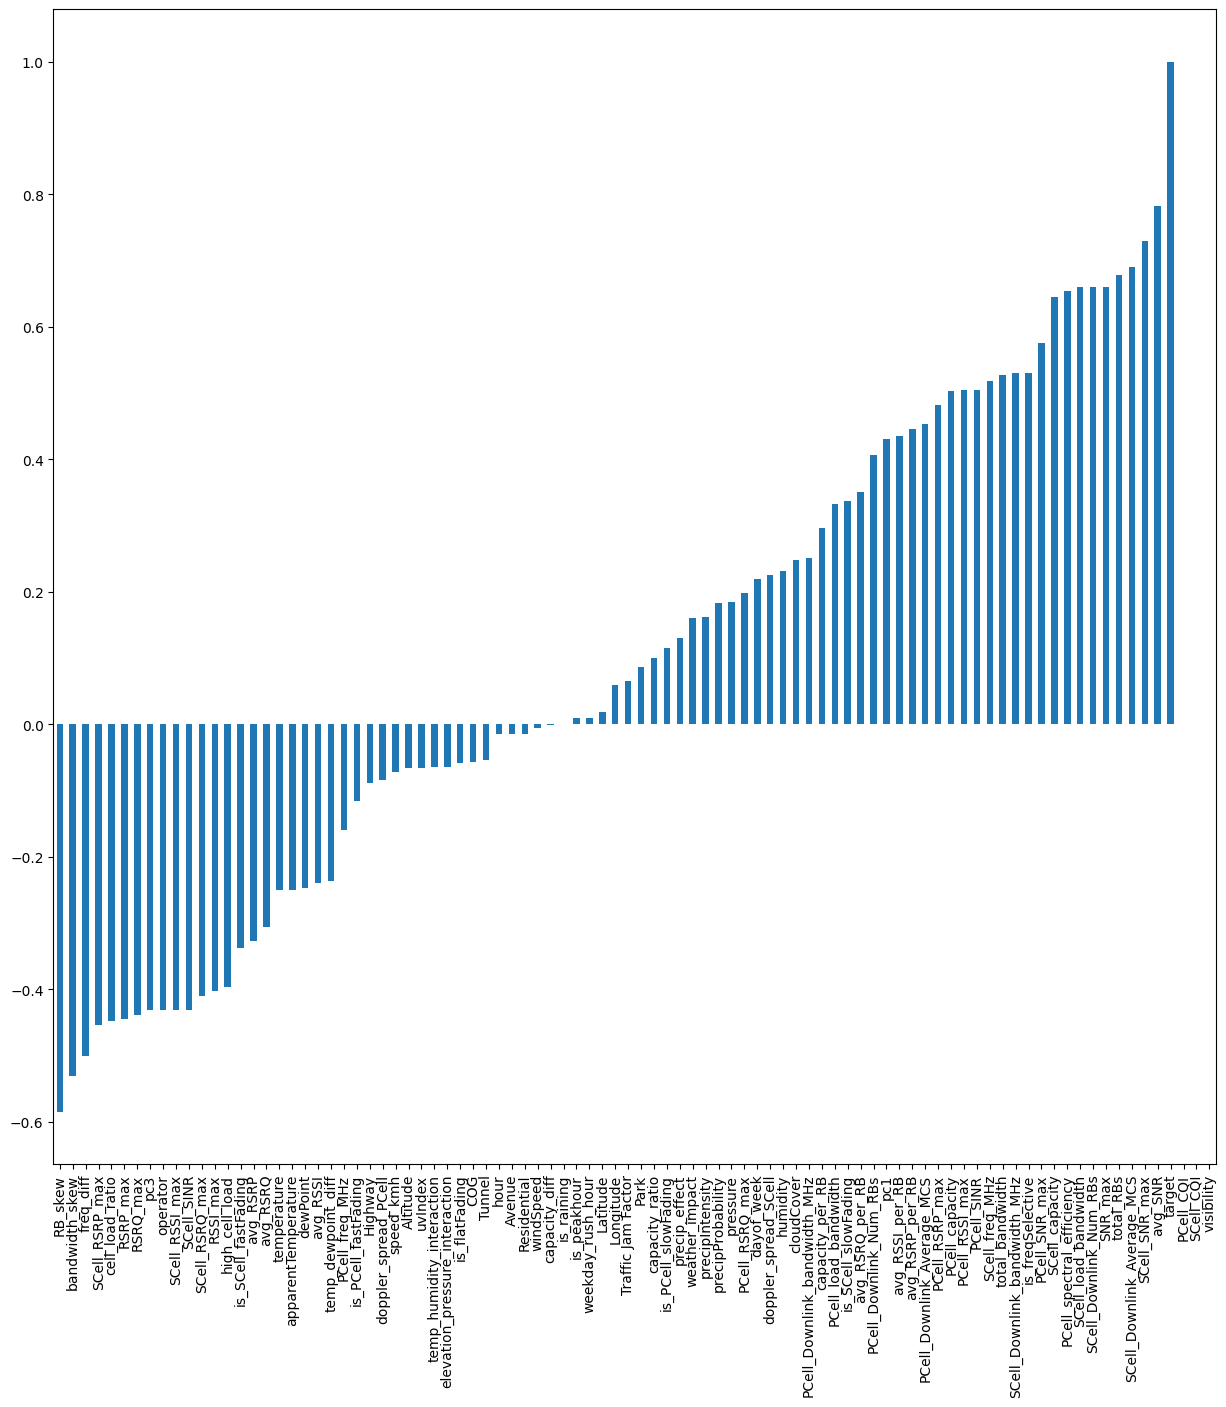

In [58]:
temp = X_train.copy()
temp["target"] = y_train
temp.corr()['target'].sort_values().plot(kind='bar', figsize=(15,15))
temp.corr()['target'].abs().sort_values(ascending=True).head(20)


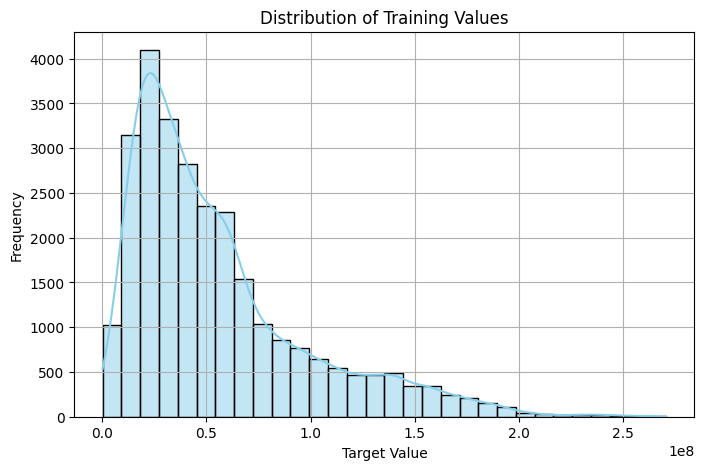

In [59]:

plt.figure(figsize=(8, 5))
sns.histplot(y_train, kde=True, bins=30, color='skyblue')
plt.title("Distribution of Training Values")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

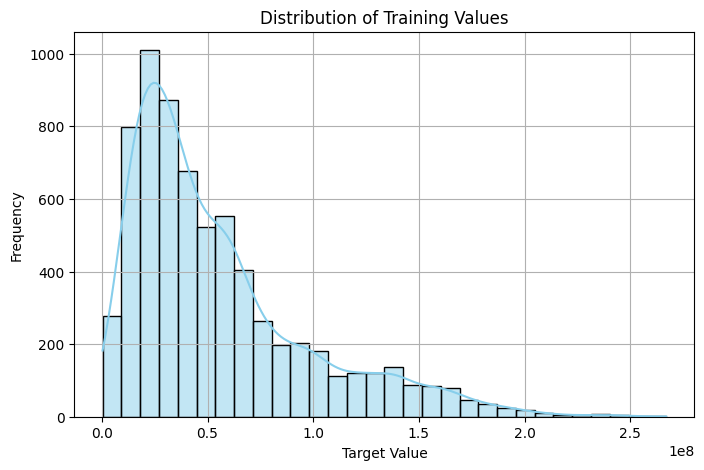

In [60]:
plt.figure(figsize=(8, 5))
sns.histplot(y_val, kde=True, bins=30, color='skyblue')
plt.title("Distribution of Training Values")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# PROTOTYPE MODELS


# MODELS

### RFR

In [61]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Model initialization
RFR_regressor = RandomForestRegressor(
    n_estimators = 228,
    max_depth = 24,
    max_features = 'sqrt',
    min_samples_split = 4,
    min_samples_leaf = 1,
    bootstrap = False,
    random_state= 42,
    n_jobs=-1,
    )



# Model fitting and prediction
RFR_regressor.fit(X_train, y_train)

y_pred = RFR_regressor.predict(X_val)


# y_pred = qt.inverse_transform(y_pred.reshape(-1, 1)).flatten()
# y_pred = np.expm1(y_pred)  # Reverse log transformation for predictions
# Model evaluation

mse = mean_squared_error(y_val, y_pred)
rf_rmse = np.sqrt(mse)/1000000
rf_mae = mean_absolute_error(y_val, y_pred)
rf_mape = mean_absolute_percentage_error(y_val, y_pred)
print(f'RMSE = {rf_rmse}, MAE = {rf_mae}, MAPE = {rf_mape}')

# Evaluasi model menggunakan R-squared (R²)
r2 = RFR_regressor.score(X_val, y_val)
print(f'R-squared: {r2}')


RMSE = 9.715094304709387, MAE = 5819646.649792917, MAPE = 0.1467486972009961
R-squared: 0.9493646023915668


In [63]:
# from skopt import BayesSearchCV
# from skopt.space import Real, Integer, Categorical
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Define the hyperparameter search space
# param_space = {
#     'n_estimators': Integer(100, 300),
#     'max_depth': Integer(5, 30),
#     'min_samples_split': Integer(2, 10),
#     'min_samples_leaf': Integer(1, 5),
#     'max_features': Categorical(['auto', 'sqrt', 'log2']),
#     'bootstrap': Categorical([True, False])
# }

# # Initialize model
# rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# # Define BayesSearchCV
# bayes_search = BayesSearchCV(
#     estimator=rf,
#     search_spaces=param_space,
#     n_iter=30,  # number of parameter combinations to try
#     cv=3,
#     scoring='neg_root_mean_squared_error',
#     n_jobs=-1,
#     verbose=2,
#     random_state=42
# )

# import numpy as np
# if not hasattr(np, 'int'):
#     np.int = int

# # Fit search
# bayes_search.fit(X_train, y_train)

# # Best model evaluation
# best_rf = bayes_search.best_estimator_
# y_pred = best_rf.predict(X_val)

# # Evaluate
# tuned_rf_rmse = np.sqrt(mean_squared_error(y_val, y_pred)) / 1e6
# tuned_rf_mae = mean_absolute_error(y_val, y_pred)
# r2 = r2_score(y_val, y_pred)
# tuned_rf_mape = mean_absolute_percentage_error(y_val, y_pred)

# # Output results
# print(f"Best Parameters: {bayes_search.best_params_}")
# print(f"RMSE = {tuned_rf_rmse:.4f} million")
# print(f"MAE = {tuned_rf_mae:.2f}")
# print(f"MAPE = {tuned_rf_mape:.4f}")
# print(f"R-squared: {r2:.4f}")

### Elastic Net

In [64]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import ElasticNet

# Model initialization
elastic_regressor = ElasticNet(
    alpha=1.0,
    l1_ratio=0.5,
    random_state=42
)
# Model fitting and prediction
elastic_regressor.fit(X_train, y_train)
y_pred = elastic_regressor.predict(X_val)


# Model evaluation
mse = mean_squared_error(y_val, y_pred)
el_rmse = np.sqrt(mse)/1000000
el_mae = mean_absolute_error(y_val, y_pred)
el_mape = mean_absolute_percentage_error(y_val,y_pred)
print(f'RMSE = {el_rmse}, MAE = {el_mae}, MAPE = {el_mape}')


# Evaluasi model menggunakan R-squared (R²)
r2 = elastic_regressor.score(X_val, y_val)
print(f'R-squared: {r2}')


RMSE = 16.992572640995533, MAE = 11678395.015096935, MAPE = 0.3577103310016832
R-squared: 0.8450903568354348


In [65]:
# Define the search space for ElasticNet
param_space = {
    'alpha': Real(1e-3, 10.0, prior='log-uniform'),
    'l1_ratio': Real(0.0, 1.0)
}

# Initialize ElasticNet
elastic = ElasticNet(random_state=42)

# BayesSearchCV setup
bayes_search_elastic = BayesSearchCV(
    estimator=elastic,
    search_spaces=param_space,
    n_iter=30,  # You can increase this for better search
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit search
bayes_search_elastic.fit(X_train, y_train)

# Best model
best_elastic = bayes_search_elastic.best_estimator_
y_pred = best_elastic.predict(X_val)

# Evaluation
tuned_el_rmse = np.sqrt(mean_squared_error(y_val, y_pred)) / 1e6
tuned_el_mae = mean_absolute_error(y_val, y_pred)
tuned_el_mape = mean_absolute_percentage_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Best Parameters: {bayes_search_elastic.best_params_}")
print(f"RMSE = {tuned_el_rmse:.4f} million")
print(f"MAE = {tuned_el_mae:.2f}")
print(f"MAE = {tuned_el_mape}")
print(f"R-squared: {r2:.4f}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

c:\Users\62811\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.044e+18, tolerance: 5.117e+15
  model = cd_fast.enet_coordinate_descent(


In [66]:
tuned_el_rmse

np.float64(14.937284835402664)

### MLP Regressor


In [67]:
from sklearn.neural_network import MLPRegressor


# --- Neural Network (MLP) Regressor Model Definition ---
# MLPRegressor stands for Multi-layer Perceptron regressor which can learn a non-linear function approximator.
# hidden_layer_sizes: A tuple defining the architecture. (100,) means one hidden layer with 100 neurons. You can have more, e.g., (100, 50).
# max_iter: The maximum number of training iterations (epochs).
# random_state: Ensures reproducibility for the random weight initialization.
# early_stopping: When set to True, it will automatically set aside a portion of training data as a validation set and stop training when validation score is not improving.
# n_iter_no_change: Number of iterations with no improvement to wait before stopping.
mlp_model = MLPRegressor(
    hidden_layer_sizes=(128,64,32),
    max_iter=100,
    random_state=42,
    activation='relu',  # Activation function for the hidden layer
    solver='adam',  # Optimization algorithm
    early_stopping=True,
    n_iter_no_change=10
)

# Note: Neural Networks are also sensitive to feature scaling.

# Model fitting and prediction
mlp_model.fit(X_train, y_train)
y_pred = mlp_model.predict(X_val)

# Model evaluation
mse = mean_squared_error(y_val, y_pred)
mlp_rmse = np.sqrt(mse)/1000000
mlp_mae = mean_absolute_error(y_val, y_pred)
mlp_mape = mean_absolute_percentage_error(y_val, y_pred)
print(f'RMSE = {mlp_rmse}, MAE = {mlp_mae}, MAPE = {mlp_mape}')


# Evaluasi model menggunakan R-squared (R²)
r2 = mlp_model.score(X_val, y_val)
print(f'R-squared: {r2}')

RMSE = 13.70997139820104, MAE = 8783534.18889717, MAPE = 0.20934847246451305
R-squared: 0.8991598969607929


c:\Users\62811\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [68]:
param_space = {
    'activation': Categorical(['relu', 'tanh']),
    'solver': Categorical(['adam']),
    'alpha': Real(1e-5, 1e-2, prior='log-uniform'),  # L2 regularization
    'learning_rate_init': Real(1e-4, 1e-2, prior='log-uniform'),
}

mlp = MLPRegressor(
    hidden_layer_sizes= (128,64,32),
    max_iter=200,          # Increased to allow convergence
    early_stopping=True,
    n_iter_no_change=10,
    random_state=42
)

mlp_search = BayesSearchCV(
    estimator=mlp,
    search_spaces=param_space,
    n_iter=25,              # Adjust based on time budget
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the search
mlp_search.fit(X_train, y_train)

best_mlp = mlp_search.best_estimator_
y_pred = best_mlp.predict(X_val)

# Evaluation
tuned_mlp_rmse = np.sqrt(mean_squared_error(y_val, y_pred)) / 1e6
tuned_mlp_mae = mean_absolute_error(y_val, y_pred)
tuned_mlp_mape = mean_absolute_percentage_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Best Parameters: {mlp_search.best_params_}")
print(f"RMSE = {tuned_mlp_rmse:.4f} million")
print(f"MAE = {tuned_mlp_mae:.2f}")
print(f"MAPE = {tuned_mlp_mape}")
print(f"R-squared: {r2:.4f}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\62811\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('relu'), 0.01, 0.01, np.str_('adam')] before, using random point ['relu', 0.0008019665494503971, 0.002703626298268203, 'adam']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\62811\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('relu'), 0.01, 0.01, np.str_('adam')] before, using random point ['relu', 1.4774647503592164e-05, 0.0017932379483105224, 'adam']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\62811\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('relu'), 1e-05, 0.01, np.str_('adam')] before, using random point ['relu', 0.006683174368629314, 0.006431719904361245, 'adam']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\62811\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('relu'), 1e-05, 0.01, np.str_('adam')] before, using random point ['tanh', 0.00015545219152531396, 0.00020423317364628253, 'adam']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\62811\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('relu'), 1e-05, 0.01, np.str_('adam')] before, using random point ['tanh', 0.0002764114281340061, 0.0007898830100648066, 'adam']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\62811\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('relu'), 1e-05, 0.01, np.str_('adam')] before, using random point ['tanh', 4.951541944270458e-05, 0.003000380946163588, 'adam']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\62811\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('relu'), 1e-05, 0.01, np.str_('adam')] before, using random point ['relu', 0.002492516643030836, 0.0007146042661355719, 'adam']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\62811\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('relu'), 0.01, 0.01, np.str_('adam')] before, using random point ['relu', 0.0006117230624870542, 0.001609683209696022, 'adam']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\62811\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('relu'), 0.01, 0.01, np.str_('adam')] before, using random point ['relu', 9.633460882975223e-05, 0.00016957048192028622, 'adam']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\62811\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('relu'), 0.01, 0.01, np.str_('adam')] before, using random point ['relu', 2.0903034081276297e-05, 0.00847993966916336, 'adam']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\62811\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('relu'), 0.01, 0.01, np.str_('adam')] before, using random point ['tanh', 0.003502056526779501, 0.0027416178880989533, 'adam']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\62811\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('relu'), 0.01, 0.01, np.str_('adam')] before, using random point ['tanh', 0.0016466127452779676, 0.00016416393561885243, 'adam']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: OrderedDict({'activation': 'relu', 'alpha': 0.001343765141677743, 'learning_rate_init': 0.01, 'solver': 'adam'})
RMSE = 10.8800 million
MAE = 6674719.90
MAPE = 0.16579375659362164
R-squared: 0.9365


c:\Users\62811\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### XGBOOST


In [69]:
import xgboost as xgb

# Model initialization
xgb_model = xgb.XGBRegressor(
    colsample_bytree=0.929847850296951,
    gamma=5.0,
    learning_rate=0.03148971908446977,
    max_depth=8,
    n_estimators=1500,
    reg_alpha=0.036477203873806555,
    reg_lambda=10.0,
    subsample=0.6,
    objective='reg:squarederror',  # for regression
    random_state=42  # optional, for reproducibility
)


# Model fitting and prediction
xgb_model.fit(X_train, y_train, verbose= True)
y_pred = xgb_model.predict(X_val)

# y_pred = qt.inverse_transform(y_pred.reshape(-1, 1)).flatten()
# y_pred = np.expm1(y_pred)  # Reverse log transformation for predictions

# Model evaluation
mse = mean_squared_error(y_val, y_pred)
xgb_rmse = np.sqrt(mse)/1000000
xgb_mae = mean_absolute_error(y_val, y_pred)
xgb_mape = mean_absolute_percentage_error(y_val, y_pred)
print(f' MSE = {mse}, RMSE = {xgb_rmse}, MAE = {xgb_mae}, MAPE = {xgb_mape}')

# Evaluasi model menggunakan R-squared (R²)
r2 = xgb_model.score(X_val, y_val)
print(f'R-squared: {r2}')

 MSE = 84976014838087.06, RMSE = 9.218243587478424, MAE = 5592913.943280452, MAPE = 0.13895947313445503
R-squared: 0.9544113698014874


In [70]:
# import shap
# #  --- SHAP Value Calculation and Plotting ---
# print("\n--- Generating SHAP Plot ---")

# # 1. Create a SHAP explainer for the XGBoost model.
# #    shap.TreeExplainer works directly with tree-based models.
# explainer = shap.TreeExplainer(xgb_model)

# # 2. Get the data for SHAP value calculation.
# #    It's best to use a sample of your *preprocessed* X_train data.
# #    Using a smaller sample makes the plot generation faster.
# sample_size = min(3000, X_train.shape[0]) # Use up to 1000 samples, or less if X_train is smaller
# X_shap_sample = X_train.sample(n=sample_size, random_state=42)

# # 3. Calculate SHAP values
# print(f"Calculating SHAP values for {sample_size} samples... This may take a moment.")
# shap_values = explainer.shap_values(X_shap_sample)
# print("SHAP values calculated.")

# # 4. Generate the SHAP summary plot (beeswarm plot)
# import matplotlib.pyplot as plt

# # Set a larger figure size for better readability, similar to your image
# # Generate the SHAP summary plot, displaying more features
# plt.figure(figsize=(16, 16)) # You might need a larger figure size for more features

# # Set max_display to a higher number, or even len(X_shap_sample.columns) to see all
# # Be cautious with very large numbers as it can make the plot unreadable.
# shap.summary_plot(shap_values, X_shap_sample, plot_type="dot", max_display=70, show=False)

# plt.title("SHAP Feature Importance for XGBoost Model (V2X Throughput)", fontsize=16)
# plt.tight_layout()
# plt.show()

# # To show ALL features (be very careful with readability if you have many)
# # plt.figure(figsize=(12, len(X_shap_sample.columns) * 0.4)) # Dynamically adjust height
# # shap.summary_plot(shap_values, X_shap_sample, plot_type="dot", max_display=len(X_shap_sample.columns), show=False)
# # plt.title("SHAP Feature Importance for XGBoost Model (V2X Throughput - All Features)", fontsize=16)
# # plt.tight_layout()
# # plt.show()

In [71]:
X_train["is_SCell_fastFading"].value_counts()

is_SCell_fastFading
 0.52893    21425
-1.89061     5994
Name: count, dtype: int64

In [72]:
import xgboost as xgb
param_space = {
    
    'n_estimators': Integer(300, 1500),
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.005, 0.2, prior='log-uniform'),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'gamma': Real(0, 5),
    'reg_alpha': Real(1e-6, 10.0, prior='log-uniform'),
    'reg_lambda': Real(1e-6, 10.0, prior='log-uniform'),
}

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    tree_method='hist',
    device = "cpu"  # use 'gpu_hist' if using GPU
)

xgb_search = BayesSearchCV(
    estimator=xgb_model,
    search_spaces=param_space,
    n_iter=30,  # adjust this for more/less thorough tuning
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

xgb_search.fit(X_train, y_train)

best_xgb = xgb_search.best_estimator_
y_pred = best_xgb.predict(X_val)

tuned_xgb_rmse = np.sqrt(mean_squared_error(y_val, y_pred)) / 1e6
tuned_xgb_mae = mean_absolute_error(y_val, y_pred)
tuned_xgb_mape = mean_absolute_percentage_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Best Hyperparameters:", xgb_search.best_params_)
print(f"RMSE = {tuned_xgb_rmse:.4f} million")
print(f"MAE = {tuned_xgb_mae:.2f}")
print(f"MAPE = {tuned_xgb_mape}")
print(f"R-squared: {r2:.4f}")



Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

### LGBM

In [73]:
import lightgbm as lgb
# Model initialization
lgb_model = lgb.LGBMRegressor(
    colsample_bytree=0.6872341132074344,
    learning_rate=0.07291240534550018,
    max_depth=13,
    min_child_samples=22,
    n_estimators=1283,
    num_leaves=60,
    reg_alpha=10.0,
    reg_lambda=0.006309196644296014,
    subsample=0.727578716325976,
    objective='regression',  # optional: for RMSE optimization
    random_state=42  # optional: for reproducibility
)
# Model fitting and prediction
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_val)
# Model evaluation
mse = mean_squared_error(y_val, y_pred)
lgb_rmse = np.sqrt(mse)/1000000
lgb_mae = mean_absolute_error(y_val, y_pred)
lgb_mape = mean_absolute_percentage_error(y_val, y_pred)
print(f' MSE = {mse}, RMSE = {lgb_rmse}, MAE = {lgb_mae}, MAPE = {lgb_mape}')

# Evaluasi model menggunakan R-squared (R²)
r2 = lgb_model.score(X_val, y_val)
print(f'R-squared: {r2}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10959
[LightGBM] [Info] Number of data points in the train set: 27419, number of used features: 86
[LightGBM] [Info] Start training from score 55561497.209964
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

In [74]:
from lightgbm import LGBMRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

param_space = {
    'learning_rate': Real(0.005, 0.2, prior='log-uniform'),
    'n_estimators': Integer(300, 1500),
    'num_leaves': Integer(20, 100),
    'max_depth': Integer(3, 15),
    'min_child_samples': Integer(5, 100),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'reg_alpha': Real(1e-6, 10.0, prior='log-uniform'),
    'reg_lambda': Real(1e-6, 10.0, prior='log-uniform')
}

lgb_estimator = LGBMRegressor(
    objective='regression',
    random_state=42,
    n_jobs=-1,
    device='cpu'  # change to 'gpu' if applicable and configured
)

lgb_search = BayesSearchCV(
    estimator=lgb_estimator,
    search_spaces=param_space,
    n_iter=30,  # increase for better tuning
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

lgb_search.fit(X_train, y_train)


best_lgb = lgb_search.best_estimator_
y_pred = best_lgb.predict(X_val)

tuned_lgbm_rmse = np.sqrt(mean_squared_error(y_val, y_pred)) / 1e6
tuned_lgbm_mae = mean_absolute_error(y_val, y_pred)
tuned_lgbm_mape = mean_absolute_percentage_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Best Parameters:", lgb_search.best_params_)
print(f"RMSE = {tuned_lgbm_rmse:.4f} million")
print(f"MAE = {tuned_lgbm_mae:.2f}")
print(f"MAPE = {tuned_lgbm_mape}")
print(f"R-squared: {r2:.4f}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

### CAT

In [75]:
import catboost as cb
# Model initialization

catboost_model = cb.CatBoostRegressor(
    colsample_bylevel=1.0,
    depth=8,
    iterations=1909,
    l2_leaf_reg=0.3959812795407536,
    learning_rate=0.03582991226441217,
    min_data_in_leaf=1,
    subsample=0.674434610721399,
    random_seed=42,  # For reproducibility
    verbose=0,       # Suppress training output
    thread_count=-1 
)
# Model fitting and prediction
catboost_model.fit(X_train, y_train, verbose=True)
y_pred = catboost_model.predict(X_val)
# Model evaluation
mse = mean_squared_error(y_val, y_pred)
cat_rmse = np.sqrt(mse)/1000000
cat_mae = mean_absolute_error(y_val, y_pred)
cat_mape = mean_absolute_percentage_error(y_val,y_pred)
print(f' MSE = {mse}, RMSE = {cat_rmse}, MAE = {cat_mae}, MAPE = {cat_mape}')
# Evaluasi model menggunakan R-squared (R²)
r2 = catboost_model.score(X_val, y_val)
print(f'R-squared: {r2}')

0:	learn: 41914387.2246429	total: 171ms	remaining: 5m 26s
1:	learn: 40696455.9216388	total: 194ms	remaining: 3m 5s
2:	learn: 39530936.0691070	total: 220ms	remaining: 2m 19s
3:	learn: 38405669.1036235	total: 246ms	remaining: 1m 57s
4:	learn: 37309166.5462967	total: 273ms	remaining: 1m 44s
5:	learn: 36288369.1078307	total: 299ms	remaining: 1m 34s
6:	learn: 35269716.1743294	total: 326ms	remaining: 1m 28s
7:	learn: 34285964.6107926	total: 355ms	remaining: 1m 24s
8:	learn: 33370514.1176169	total: 383ms	remaining: 1m 20s
9:	learn: 32463234.0003788	total: 413ms	remaining: 1m 18s
10:	learn: 31591752.3932805	total: 441ms	remaining: 1m 16s
11:	learn: 30760774.9675829	total: 466ms	remaining: 1m 13s
12:	learn: 29950037.8750141	total: 495ms	remaining: 1m 12s
13:	learn: 29197856.8289931	total: 522ms	remaining: 1m 10s
14:	learn: 28468905.6607426	total: 546ms	remaining: 1m 8s
15:	learn: 27762183.1948955	total: 570ms	remaining: 1m 7s
16:	learn: 27085423.6750656	total: 595ms	remaining: 1m 6s
17:	learn: 

In [76]:
search_space = {
    'iterations': Integer(300, 2000),
    'learning_rate': Real(0.01, 0.2, prior='log-uniform'),
    'depth': Integer(4, 10),  # ✅ Typical alternative
    'min_data_in_leaf': Integer(1, 100),
    'l2_leaf_reg': Real(1e-3, 10.0, prior='log-uniform'),
    'subsample': Real(0.6, 1.0, prior='uniform'),
    'colsample_bylevel': Real(0.6, 1.0, prior='uniform')
}

cat_estimator = cb.CatBoostRegressor(
    objective='RMSE',
    random_state=42,   # change to 'gpu' if applicable and configured
)

cat_search = BayesSearchCV(
    estimator=cat_estimator,
    search_spaces=search_space,
    n_iter=30,  # increase for better tuning
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

cat_search.fit(X_train, y_train)


best_cat = cat_search.best_estimator_
y_pred = best_cat.predict(X_val)

tuned_cat_rmse = np.sqrt(mean_squared_error(y_val, y_pred)) / 1e6
tuned_cat_mae = mean_absolute_error(y_val, y_pred)
tuned_cat_mape = mean_absolute_percentage_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Best Parameters:", cat_search.best_params_)
print(f"RMSE = {tuned_cat_rmse:.4f} million")
print(f"MAE = {tuned_cat_mae:.2f}")
print(f"MAPE = {tuned_cat_mape}")
print(f"R-squared: {r2:.4f}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

c:\Users\62811\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [ ]:
tuned_cat_rmse

9.328024649542195

## Individual Model Comparison

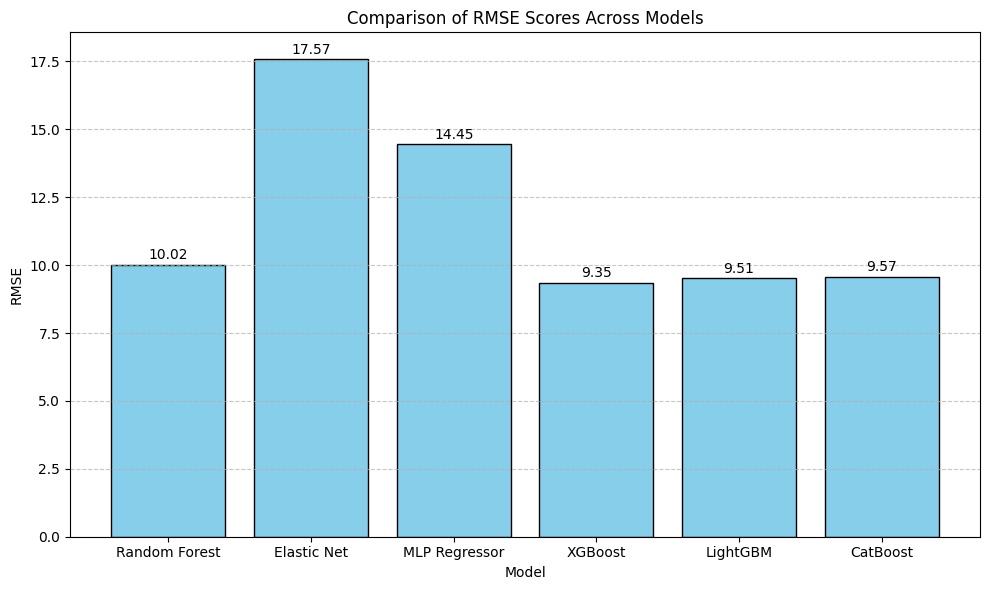

In [ ]:
import matplotlib.pyplot as plt

# Example RMSE scores for different models (replace with your actual values)
model_names = [
    'Random Forest',
    'Elastic Net',
    'MLP Regressor',
    'XGBoost',
    'LightGBM',
    'CatBoost'
]

rmse_scores = [
    rf_rmse,
    el_rmse,
    mlp_rmse,
    xgb_rmse,
    lgb_rmse,
    cat_rmse
]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, rmse_scores, color='skyblue', edgecolor='black')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE Scores Across Models')
plt.ylim(0, max(rmse_scores) + 1)

# Add RMSE values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

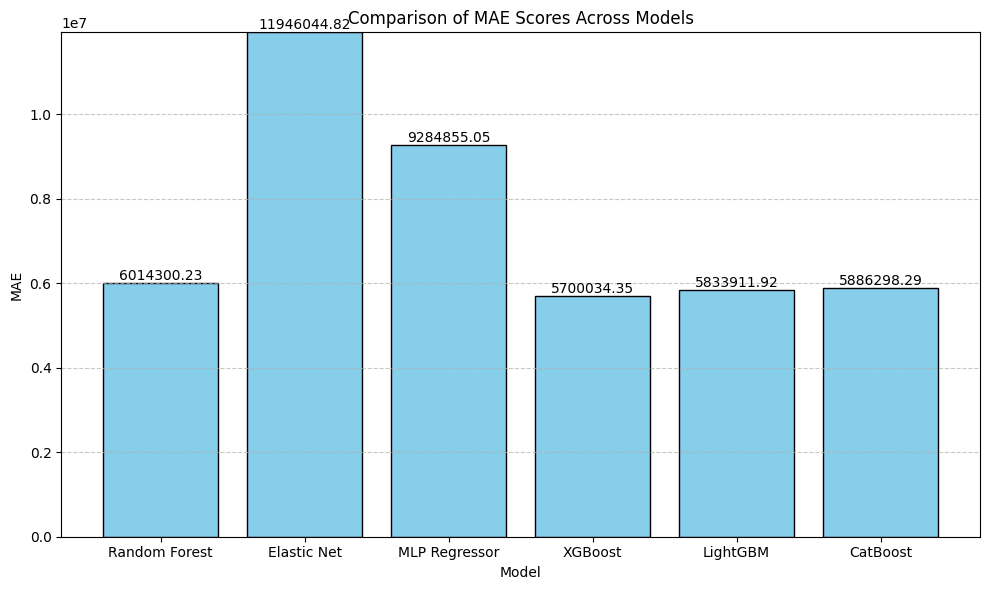

In [ ]:
import matplotlib.pyplot as plt

# Example RMSE scores for different models (replace with your actual values)
model_names = [
    'Random Forest',
    'Elastic Net',
    'MLP Regressor',
    'XGBoost',
    'LightGBM',
    'CatBoost'
]

mae_scores = [
    rf_mae,
    el_mae,
    mlp_mae,
    xgb_mae,
    lgb_mae,
    cat_mae
]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, mae_scores, color='skyblue', edgecolor='black')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Comparison of MAE Scores Across Models')
plt.ylim(0, max(mae_scores) + 1)

# Add RMSE values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Example RMSE scores for different models (replace with your actual values)
model_names = [
    'Random Forest',
    'Elastic Net',
    'MLP Regressor',
    'XGBoost',
    'LightGBM',
    'CatBoost'
]

mape_scores = [
    rf_mape,
    el_mape,
    mlp_mape,
    xgb_mape,
    lgb_mape,
    cat_mape
]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, mape_scores, color='skyblue', edgecolor='black')
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.title('Comparison of MAPE Scores Across Models')
plt.ylim(0, max(mape_scores) + 1)

# Add RMSE values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Individual tuned model comparison

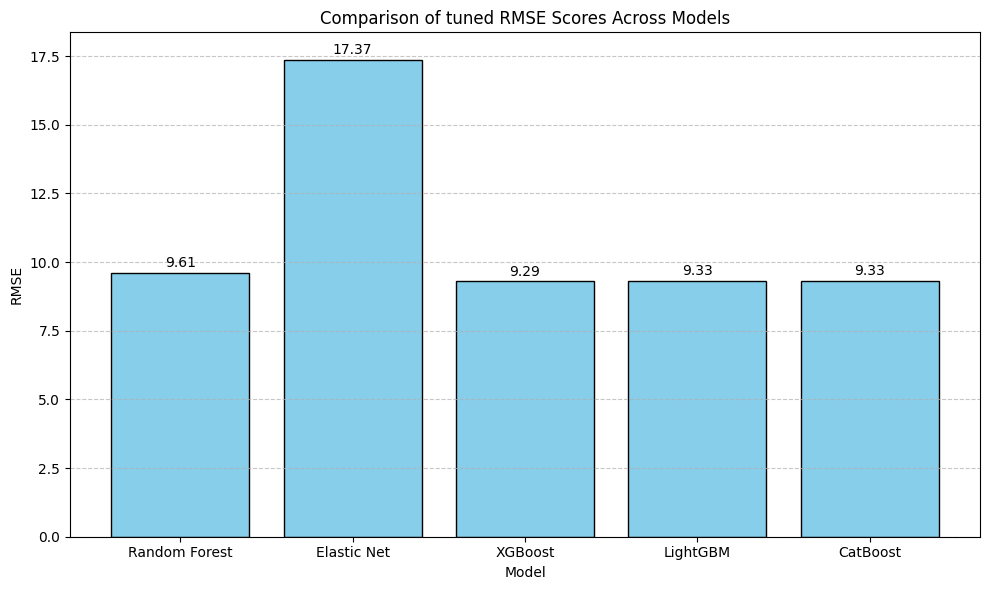

In [ ]:
import matplotlib.pyplot as plt

# Example RMSE scores for different models (replace with your actual values)
model_names = [
    'Random Forest',
    'Elastic Net',
    'MLP Regressor',
    'XGBoost',
    'LightGBM',
    'CatBoost'
]

rmse_scores = [
    tuned_rf_rmse,
    tuned_el_rmse,
    tuned_mlp_rmse,
    tuned_xgb_rmse,
    tuned_lgbm_rmse,
    tuned_cat_rmse
]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, rmse_scores, color='skyblue', edgecolor='black')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Comparison of tuned RMSE Scores Across Models')
plt.ylim(0, max(rmse_scores) + 1)

# Add RMSE values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Example RMSE scores for different models (replace with your actual values)
model_names = [
    'Random Forest',
    'Elastic Net',
    'MLP Regressor',
    'XGBoost',
    'LightGBM',
    'CatBoost'
]

mape_scores = [
    tuned_rf_mape,
    tuned_el_mape,
    tuned_mlp_mape,
    tuned_xgb_mape,
    tuned_lgbm_mape,
    tuned_cat_mape
]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, mape_scores, color='skyblue', edgecolor='black')
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.title('Comparison of tuned MAPE Scores Across Models')
plt.ylim(0, max(mape_scores) + 1)

# Add RMSE values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## STACKING MODELS

In [ ]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet, Ridge
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# Use boosting models as the strongest models and MLP to capture non linear relation ships due to all boosting models, having non linear outputs as a tree based model
# There are also an effective diversity  due to the different approach each model has towards the tree based regression.

# 1) First inner stack: XGBoost, LightGBM, CatBoost → ElasticNet meta‐learner
stack1 = StackingRegressor(
    estimators=[
        ("xgb",  xgb.XGBRegressor(
            colsample_bytree=0.929847850296951,
            gamma=5.0,
            learning_rate=0.03148971908446977,
            max_depth=8,
            n_estimators= 1500,
            reg_alpha=0.036477203873806555,
            reg_lambda=10.0,
            subsample=0.6,
            objective='reg:squarederror',  # for regression
            random_state=42  # optional, for reproducibility
            )),
        ("lgbm", lgb.LGBMRegressor(
                colsample_bytree=0.6872341132074344,
            learning_rate=0.07291240534550018,
            max_depth=13,
            min_child_samples=22,
            n_estimators=1283,
            num_leaves=60,
            reg_alpha=10.0,
            reg_lambda=0.006309196644296014,
            subsample=0.727578716325976,
            objective='regression',  # optional: for RMSE optimization
            random_state=42  # optional: for reproducibility
            )),
        ("cat",  CatBoostRegressor(
               colsample_bylevel=1.0,
            depth=8,
            iterations=1909,
            l2_leaf_reg=0.3959812795407536,
            learning_rate=0.03582991226441217,
            min_data_in_leaf=1,
            subsample=0.674434610721399,
            random_seed=42,  # For reproducibility
            verbose=0,       # Suppress training output
            thread_count=-1 
            )),
    ],
    final_estimator = MLPRegressor(
    hidden_layer_sizes=(128,64),
    max_iter=100,
    random_state=42,
    activation='relu',  # Activation function for the hidden layer
    solver='adam',  # Optimization algorithm
    early_stopping=True,
    n_iter_no_change=10
),
    cv=3,
    n_jobs=-1,
    passthrough= True
)
stack1.fit(X_train,y_train)

# Model fitting and prediction
y_pred = stack1.predict(X_val)
# Model evaluation
mse = mean_squared_error(y_val, y_pred)
stack1_rmse = np.sqrt(mse)/1000000
stack1_mae = mean_absolute_error(y_val, y_pred)
stack1_mape = mean_absolute_percentage_error(y_val,y_pred)
print(f' MSE = {mse}, RMSE = {stack1_rmse}, MAE = {stack1_mae}, MAPE = {stack1_mape}')
# Evaluasi model menggunakan R-squared (R²)
r2 = stack1.score(X_val, y_val)
print(f'R-squared: {r2}')


 MSE = 82777099798856.77, RMSE = 9.098192117055826, MAE = 5513419.221172295, MAPE = 0.1375561909940084
R-squared: 0.9555910617975457


In [ ]:
len(X_train.columns)

90

In [ ]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet, Ridge
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# Use boosting models as the strongest models and RF to capture both linear and non linear relation ships while also having a strong performance as a predictor so it can understand complex relations from stronger base models
# There are also an effective diversity  due to the different approach each model has towards the tree based regression.

stack2 = StackingRegressor(
    estimators=[
        ("xgb",  xgb.XGBRegressor(
            colsample_bytree=0.929847850296951,
            gamma=5.0,
            learning_rate=0.03148971908446977,
            max_depth=8,
            n_estimators= 1500,
            reg_alpha=0.036477203873806555,
            reg_lambda=10.0,
            subsample=0.6,
            objective='reg:squarederror',  # for regression
            random_state=42  # optional, for reproducibility
            )),
        ("lgbm", lgb.LGBMRegressor(
                colsample_bytree=0.6872341132074344,
            learning_rate=0.07291240534550018,
            max_depth=13,
            min_child_samples=22,
            n_estimators=1283,
            num_leaves=60,
            reg_alpha=10.0,
            reg_lambda=0.006309196644296014,
            subsample=0.727578716325976,
            objective='regression',  # optional: for RMSE optimization
            random_state=42  # optional: for reproducibility
            )),
        ("cat",  CatBoostRegressor(
               colsample_bylevel=1.0,
            depth=8,
            iterations=1909,
            l2_leaf_reg=0.3959812795407536,
            learning_rate=0.03582991226441217,
            min_data_in_leaf=1,
            subsample=0.674434610721399,
            random_seed=42,  # For reproducibility
            verbose=0,       # Suppress training output
            thread_count=-1 
            )),
        # ("el", ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42))
    ],
    final_estimator= RandomForestRegressor(
        n_estimators = 228,
        max_depth = 24,
        max_features = 'sqrt',
        min_samples_split = 4,
        min_samples_leaf = 1,
        bootstrap = False,
        random_state= 42,
        n_jobs=-1,
),
    cv=5,
    n_jobs=-1,
    passthrough= True
)
stack2.fit(X_train,y_train)

# Model fitting and prediction
y_pred = stack2.predict(X_val)
# Model evaluation
mse = mean_squared_error(y_val, y_pred)
stack2_rmse = np.sqrt(mse)/1000000
stack2_mae = mean_absolute_error(y_val, y_pred)
stack2_mape = mean_absolute_percentage_error(y_val,y_pred)
print(f' MSE = {mse}, RMSE = {stack2_rmse}, MAE = {stack2_mae}, MAPE = {stack_mape}')
# Evaluasi model menggunakan R-squared (R²)
r2 = stack2.score(X_val, y_val)
print(f'R-squared: {r2}')



 MSE = 82293173244247.97, RMSE = 9.071558479348958, MAE = 5424148.490853838, MAPE = 0.13559159723154407
R-squared: 0.9558506826891977


## Tuning Metalearner

In [ ]:
# # 2) Second inner stack: MLP, RandomForest → ElasticNet meta‐learner


# stack3 = StackingRegressor(
#     estimators=[
#         ("xgb",  xgb.XGBRegressor(
#             colsample_bytree=0.929847850296951,
#             gamma=5.0,
#             learning_rate=0.03148971908446977,
#             max_depth=8,
#             n_estimators= 1500,
#             reg_alpha=0.036477203873806555,
#             reg_lambda=10.0,
#             subsample=0.6,
#             objective='reg:squarederror',  # for regression
#             random_state=42  # optional, for reproducibility
#             )),
#         ("lgbm", lgb.LGBMRegressor(
#                 colsample_bytree=0.6872341132074344,
#             learning_rate=0.07291240534550018,
#             max_depth=13,
#             min_child_samples=22,
#             n_estimators=1283,
#             num_leaves=60,
#             reg_alpha=10.0,
#             reg_lambda=0.006309196644296014,
#             subsample=0.727578716325976,
#             objective='regression',  # optional: for RMSE optimization
#             random_state=42  # optional: for reproducibility
#             )),
#         ("cat",  CatBoostRegressor(
#                colsample_bylevel=1.0,
#             depth=8,
#             iterations=1909,
#             l2_leaf_reg=0.3959812795407536,
#             learning_rate=0.03582991226441217,
#             min_data_in_leaf=1,
#             subsample=0.674434610721399,
#             random_seed=42,  # For reproducibility
#             verbose=0,       # Suppress training output
#             thread_count=-1 
#             )),
#         ("el", ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)),

#         ('mlp', MLPRegressor(
#             hidden_layer_sizes=(128,64, 32),
#             max_iter=100,
#             random_state=42,
#             activation='relu',  # Activation function for the hidden layer
#             solver='adam',  # Optimization algorithm
#             early_stopping=True,
#             n_iter_no_change=10
#         )),
#         # ('rf', RandomForestRegressor(
#         #     n_estimators = 228,
#         #     max_depth = 24,
#         #     max_features = 'sqrt',
#         #     min_samples_split = 4,
#         #     min_samples_leaf = 1,
#         #     bootstrap = False,
#         #     random_state= 42,
#         #     n_jobs=-1,))
        
#     ],
#     final_estimator= RandomForestRegressor(
#         n_estimators = 228,
#         max_depth = 24,
#         max_features = 'sqrt',
#         min_samples_split = 4,
#         min_samples_leaf = 1,
#         bootstrap = False,
#         random_state= 42,
#         n_jobs=-1,

#     ),
#     cv=5,
#     n_jobs=-1,
#     passthrough= True
# )

# stack3.fit(X_train,y_train)

# # Model fitting and prediction
# y_pred = stack3.predict(X_val)
# # Model evaluation
# mse = mean_squared_error(y_val, y_pred)
# stack3_rmse = np.sqrt(mse)/1000000
# stack3_mae = mean_absolute_error(y_val, y_pred)
# stack3_mape = mean_absolute_percentage_error(y_val,y_pred)
# print(f' MSE = {mse}, RMSE = {stack3_rmse}, MAE = {stack3_mae}, MAPE = {stack3_mape}')
# # Evaluasi model menggunakan R-squared (R²)
# r2 = stack3.score(X_val, y_val)
# print(f'R-squared: {r2}')



 MSE = 83450191987302.4, RMSE = 9.135107661505824, MAE = 5448024.684778584, MAPE = 0.1352491351190816
R-squared: 0.955229955773369


In [ ]:

# # 5) Fit & predict
# # final_stack.fit(X_train, y_train)
# y_pred = final_stack.predict(X_val)

In [ ]:
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# estimators = [
#     ('lgb1', lgb.LGBMRegressor(n_estimators=200,
#                                random_state=42,
#                                device ='cpu')),

#     ('xgb', xgb.XGBRegressor(
#     n_estimators=1500,
#     learning_rate=0.01,
#     max_depth=8,
#     nums_leaves=31,
#     random_state=42,
#     n_jobs=-1,
#     device='cpu',
# )),

#     ('lgb2', lgb.LGBMRegressor(n_estimators=200,
#                                random_state=42,
#                                device ='cpu')),

#     ('cat', cb.CatBoostRegressor(n_estimators=200,
#                                  random_state=42,
#                                  verbose=0,
#                                  task_type='CPU')),
#     ('rf', RandomForestRegressor(
#     n_estimators = 228,
#     max_depth = 24,
#     max_features = 'sqrt',
#     min_samples_split = 4,
#     min_samples_leaf = 1,
#     bootstrap = False,
#     random_state= 42,
#     n_jobs=-1,
#     ))
# ]

# meta_learner = RandomForestRegressor(n_estimators=50, random_state=42)

# stacked_models= StackingRegressor(
#         estimators=estimators,
#         final_estimator=meta_learner,
#         cv=kf,
#         passthrough=True
#     )

# # Latih model dengan data yang sudah distandarkan
# stacked_models.fit(X_train, y_train)  # Menggunakan y_train_scaled

#     # Lakukan prediksi dengan data validasi
# y_pred = stacked_models.predict(X_val)


#     # Evaluasi model menggunakan Mean Squared Error (MSE)
# mse = mean_squared_error(y_val, y_pred)
# rmse = np.sqrt(mse)  # Menghitung RMSE
# mae = mean_absolute_error(y_val, y_pred)  # Menghitung MAE

# print(f' MSE = {mse/(1000000**2)}, RMSE = {rmse/1000000}, MAE = {mae}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11047
[LightGBM] [Info] Number of data points in the train set: 27419, number of used features: 85
[LightGBM] [Info] Start training from score 55561497.209964


c:\Users\Ardell Nurahim\.conda\envs\gpu_env\lib\site-packages\xgboost\core.py:158: UserWarning: [03:34:17] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "nums_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11047
[LightGBM] [Info] Number of data points in the train set: 27419, number of used features: 85
[LightGBM] [Info] Start training from score 55561497.209964
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003977 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11038
[LightGBM] [Info] Number of data points in the train set: 21935, number of used features: 85
[LightGBM] [Info] Start training from score 55562162.434465
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, th

c:\Users\Ardell Nurahim\.conda\envs\gpu_env\lib\site-packages\xgboost\core.py:158: UserWarning: [03:34:44] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "nums_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Ardell Nurahim\.conda\envs\gpu_env\lib\site-packages\xgboost\core.py:158: UserWarning: [03:35:02] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "nums_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Ardell Nurahim\.conda\envs\gpu_env\lib\site-packages\xgboost\core.py:158: UserWarning: [03:35:20] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "nums_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Ardell Nurahim\.conda\envs\gpu_env\lib\site-packages\xgboost\core.py:158: UserWarning: [03:35:38] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "nums_leaves" } are not used.

  warni

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11038
[LightGBM] [Info] Number of data points in the train set: 21935, number of used features: 85
[LightGBM] [Info] Start training from score 55562162.434465
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11036
[LightGBM] [Info] Number of data points in the train set: 21935, number of used features: 85
[LightGBM] [Info] Start training from score 55733577.615683
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, th

In [ ]:
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# def build_stacked_model():
#     estimators = [
#         ('lgb1', lgb.LGBMRegressor(
#             n_estimators=200,
#             learning_rate=0.05,
#             max_depth=12,
#             num_leaves=31,
#             device='gpu',
#             feature_fraction=0.8,
#             bagging_fraction=0.8,
#             bagging_freq=5,
#             random_state=42,
#             deterministic=True,  # Add deterministic flag
#             force_row_wise=True  # Force row-wise processing
#         )),
#         ('lgb2', lgb.LGBMRegressor(
#             n_estimators=200,
#             learning_rate=0.03,
#             max_depth=8,
#             num_leaves=25,
#             device='gpu',
#             feature_fraction=0.7,
#             bagging_fraction=0.7,
#             bagging_freq=3,
#             random_state=42,
#             deterministic=True,  # Add deterministic flag
#             force_row_wise=True  # Force row-wise processing
#         )),
#         ('xgb', xgb.XGBRegressor(
#             n_estimators=200,
#             learning_rate=0.05,
#             max_depth=10,
#             min_child_weight=3,
#             subsample=0.8,
#             colsample_bytree=0.8,
#             random_state=42,
#             predictor="cpu_predictor",  # Use CPU predictor for deterministic results
#             tree_method='exact'  # Use exact tree method
#         ))
#     ]

#     final_estimator = lgb.LGBMRegressor(
#         n_estimators=100,
#         learning_rate=0.03,
#         max_depth=6,
#         device='gpu',
#         random_state=21,
#         deterministic=True,  # Add deterministic flag
#         force_row_wise=True  # Force row-wise processing
#     )

#     return StackingRegressor(
#         estimators=estimators,
#         final_estimator=final_estimator,
#         cv=kf,
#         n_jobs=1,
#         passthrough=True
#     )

# stacked_models = build_stacked_model()

# # Latih model dengan data yang sudah distandarkan
# stacked_models.fit(X_train, y_train)  # Menggunakan y_train_scaled

#     # Lakukan prediksi dengan data validasi
# y_pred = stacked_models.predict(X_val)


#     # Evaluasi model menggunakan Mean Squared Error (MSE)
# mse = mean_squared_error(y_val, y_pred)
# rmse = np.sqrt(mse)  # Menghitung RMSE
# mae = mean_absolute_error(y_val, y_pred)  # Menghitung MAE

# print(f' MSE = {mse}, RMSE = {rmse/1000000}, MAE = {mae}')

In [ ]:
# from sklearn.model_selection import TimeSeriesSplit

# # Since this is time-series data, use time-series cross-validation
# tscv = TimeSeriesSplit(n_splits=5)

# model = build_stacked_model()
# model.fit(X_train, y_train)

# # Evaluate with cross-validation
# cv_scores = []
# for train_idx, val_idx in tscv.split(X_train):
#     X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
#     y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

#     model.fit(X_tr, y_tr)
#     pred = model.predict(X_val)
#     cv_scores.append(np.sqrt(mean_squared_error(y_val, pred)))

# print(f"Average CV RMSE: {np.mean(cv_scores)/1e6:.3f} million units")

In [ ]:

# import xgboost as xgb
# import lightgbm as lgb
# from sklearn.ensemble import RandomForestRegressor,StackingRegressor
# from sklearn.neural_network import MLPRegressor


# estimators = [
#     ('rf',  RandomForestRegressor(n_estimators=100, random_state=4)),
#     ('xgb', xgb.XGBRegressor(n_estimators=100, random_state=42, predictor="gpu_predictor", tree_method='gpu_hist')),
#     ('lgb', lgb.LGBMRegressor(n_estimators=100, random_state=42, device ='gpu'),
#      "mlp", MLPRegressor(random_state=42,
#                          max_iter=200,
#                          hidden_layer_sizes=(64,),
#                          activation='relu',
#                          solver='adam',
#                          learning_rate_init=0.01,
#                          batch_size=32,
#                          early_stopping=True)),
# ]

# stacked_models= StackingRegressor(
#         estimators=estimators,
#         final_estimator=lgb.LGBMRegressor(n_estimators=50, random_state=42, device ='gpu'),
#         cv=5,
#         passthrough=True
#     )

# # Latih model dengan data yang sudah distandarkan
# stacked_models.fit(X_train, y_train)  # Menggunakan y_train_scaled

#     # Lakukan prediksi dengan data validasi
# y_pred = stacked_models.predict(X_val)


#     # Evaluasi model menggunakan Mean Squared Error (MSE)
# mse = mean_squared_error(y_val, y_pred)
# rmse = np.sqrt(mse)  # Menghitung RMSE
# mae = mean_absolute_error(y_val, y_pred)  # Menghitung MAE

# print(f'n_neighbors = {n_neighbors}, MSE = {mse}, RMSE = {rmse/1000000}, MAE = {mae}')
